In [165]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m')
    
sales = pd.read_csv('sales-cars.csv', parse_dates=[0], date_parser = parser,index_col=0)

In [93]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [94]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


In [91]:
sales.Month[5]

Timestamp('2016-06-01 00:00:00')

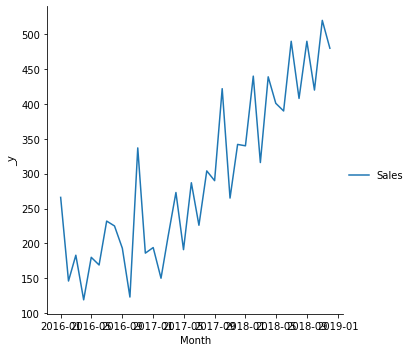

In [95]:
sns.relplot(data= sales, kind ='line')

Not Stationrity!! 
Stationrity should have constant means, variance & covarience over different periods of time.

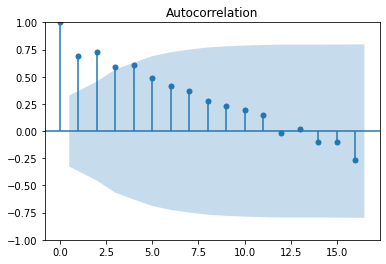

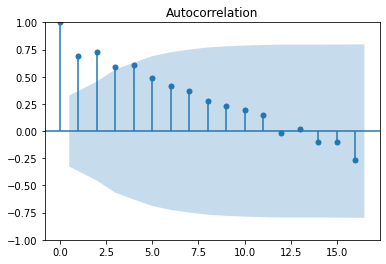

In [103]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

## Coverting Series into Stationrity 

In [108]:
sales_diff = sales.diff(periods=1)
# difference is one & its one of the compoment of ARIMA Model 
# d is 1 here

sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


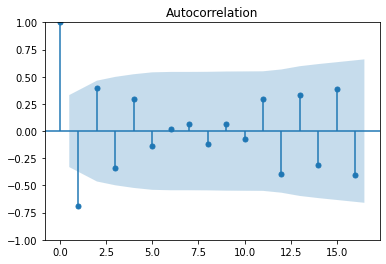

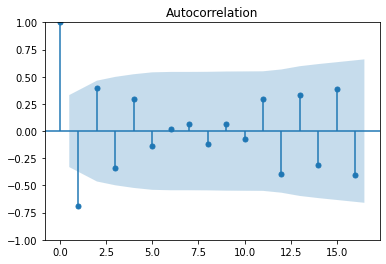

In [104]:
plot_acf(sales_diff)

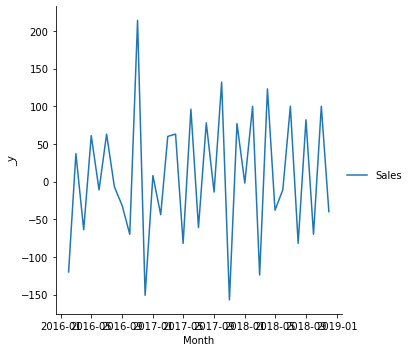

In [107]:
sns.relplot(data= sales_diff, kind = 'line')

In [112]:
X = sales.values
X.size

36

In [131]:
train = X[:27]
test = X[27:]
prediction = []
test.size

9

## AR MODEL: Auto Regressive Model 

In [162]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
model_ar = AutoReg(train,lags =4)
model_ar_fit = model_ar.fit()

In [163]:
prediction = model_ar_fit.predict(start=27,end=36)
prediction

array([400.97509331, 383.28955431, 441.97808962, 388.37332627,
       444.2159278 , 431.42498663, 470.32430198, 449.39849448,
       487.07631565, 482.51546272])

In [150]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]])

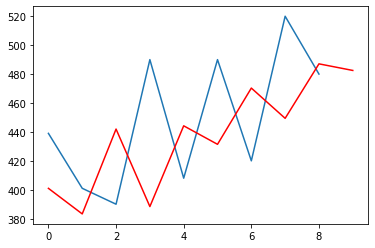

In [168]:
plt.plot(test)
plt.plot(prediction,color='red')

### ARIMA MODEL 

In [174]:
#from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.arima.model import ARIMA

In [214]:
model_arima = ARIMA(train,order=(3,3,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

288.62344297027994


In [215]:
predictions = model_arima_fit.forecast(steps=9)
predictions

array([426.7919711 , 401.91110947, 480.76020802, 427.06358697,
       504.02416312, 487.34158289, 549.44483618, 529.64335463,
       587.82569305])

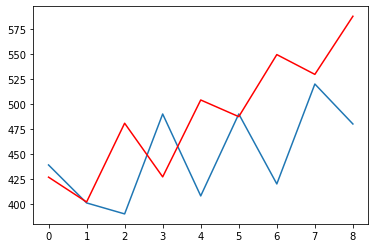

In [216]:
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
mean_squared_error(test,pre)

In [189]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

In [193]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima= ARIMA(train,order=param)
        model_fit_arima = model_arima.fit()
        print(param,model_fit_arima.aic)
    except:
        continue

(0, 0, 0) 319.45286406147864
(0, 0, 1) 318.72448140936075
(0, 0, 2) 315.2506007540125
(0, 0, 3) 316.38535246850347
(0, 0, 4) 309.81637603825925
(0, 1, 0) 309.84124796602856
(0, 1, 1) 298.3261463200624
(0, 1, 2) 296.6108204565868
(0, 1, 3) 297.63425065306194
(0, 1, 4) 299.0805206225724
(0, 2, 0) 327.18352274695803
(0, 2, 1) 304.122172463928
(0, 2, 2) 290.5599542284924
(0, 2, 3) 291.4957885893614
(0, 2, 4) 293.59179046291854
(0, 3, 0) 344.4946568664076
(0, 3, 1) 319.9666873701726
(0, 3, 2) 300.3727276990788
(0, 3, 3) 291.53040146238277
(0, 3, 4) 290.4241547484252
(0, 4, 0) 360.59327608116223
(0, 4, 1) 335.03371908873163
(0, 4, 2) 313.7789370386961
(0, 4, 3) 297.4272352280485
(0, 4, 4) 289.6606055563261
(1, 0, 0) 316.166871755728
(1, 0, 1) 313.04871846706266
(1, 0, 2) 310.97906451089756
(1, 0, 3) 311.28853015490546
(1, 0, 4) 309.0684525374961
(1, 1, 0) 297.35922755917113
(1, 1, 1) 297.665062859487
(1, 1, 2) 298.1839727421612
(1, 1, 3) 300.1783653175139
(1, 1, 4) 298.1877469131399
(1, 2, 0